In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
warnings.filterwarnings('ignore')
import re


import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [62]:
# Importing Data

df = pd.read_csv(r'C:\Users\zeyne\Desktop\Salary_Data.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\zeyne\\Desktop\\Salary_Data.csv'

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6695 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  6695 non-null   int64
 1   Gender               6695 non-null   int64
 2   Education Level      6695 non-null   int64
 3   Years of Experience  6695 non-null   int64
 4   Job Ranking          6695 non-null   int64
 5   Above Median Salary  6695 non-null   int64
dtypes: int64(6)
memory usage: 366.1 KB


In [64]:
df.describe()

,Age,Gender,Education Level,Years of Experience,Job Ranking,Above Median Salary
count,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000,6695.000000
mean,33.625990,0.552353,2.562957,8.097834,108.688574,0.495146
std,7.615807,0.501477,1.816221,6.060704,23.373552,0.500014
min,21.000000,0.000000,0.000000,0.000000,40.000000,0.000000
25%,28.000000,0.000000,1.000000,3.000000,100.000000,0.000000
50%,32.000000,1.000000,2.000000,7.000000,100.000000,0.000000
75%,38.000000,1.000000,4.000000,12.000000,130.000000,1.000000
max,62.000000,2.000000,7.000000,34.000000,160.000000,1.000000


In [65]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Job Ranking            0
Above Median Salary    0
dtype: int64

In [66]:
df.dropna(inplace=True)

In [67]:
df['Job Title'].value_counts()

KeyError: 'Job Title'

In [68]:
job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

KeyError: 'Job Title'

In [69]:
df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

KeyError: 'Job Title'

In [70]:
df['Education Level'].value_counts()

Education Level
1    2263
4    1572
5    1367
0     755
2     448
3     288
7       1
6       1
Name: count, dtype: int64

In [71]:
df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
1    2263
4    1572
5    1367
0     755
2     448
3     288
7       1
6       1
Name: count, dtype: int64

KeyError: 'Salary'

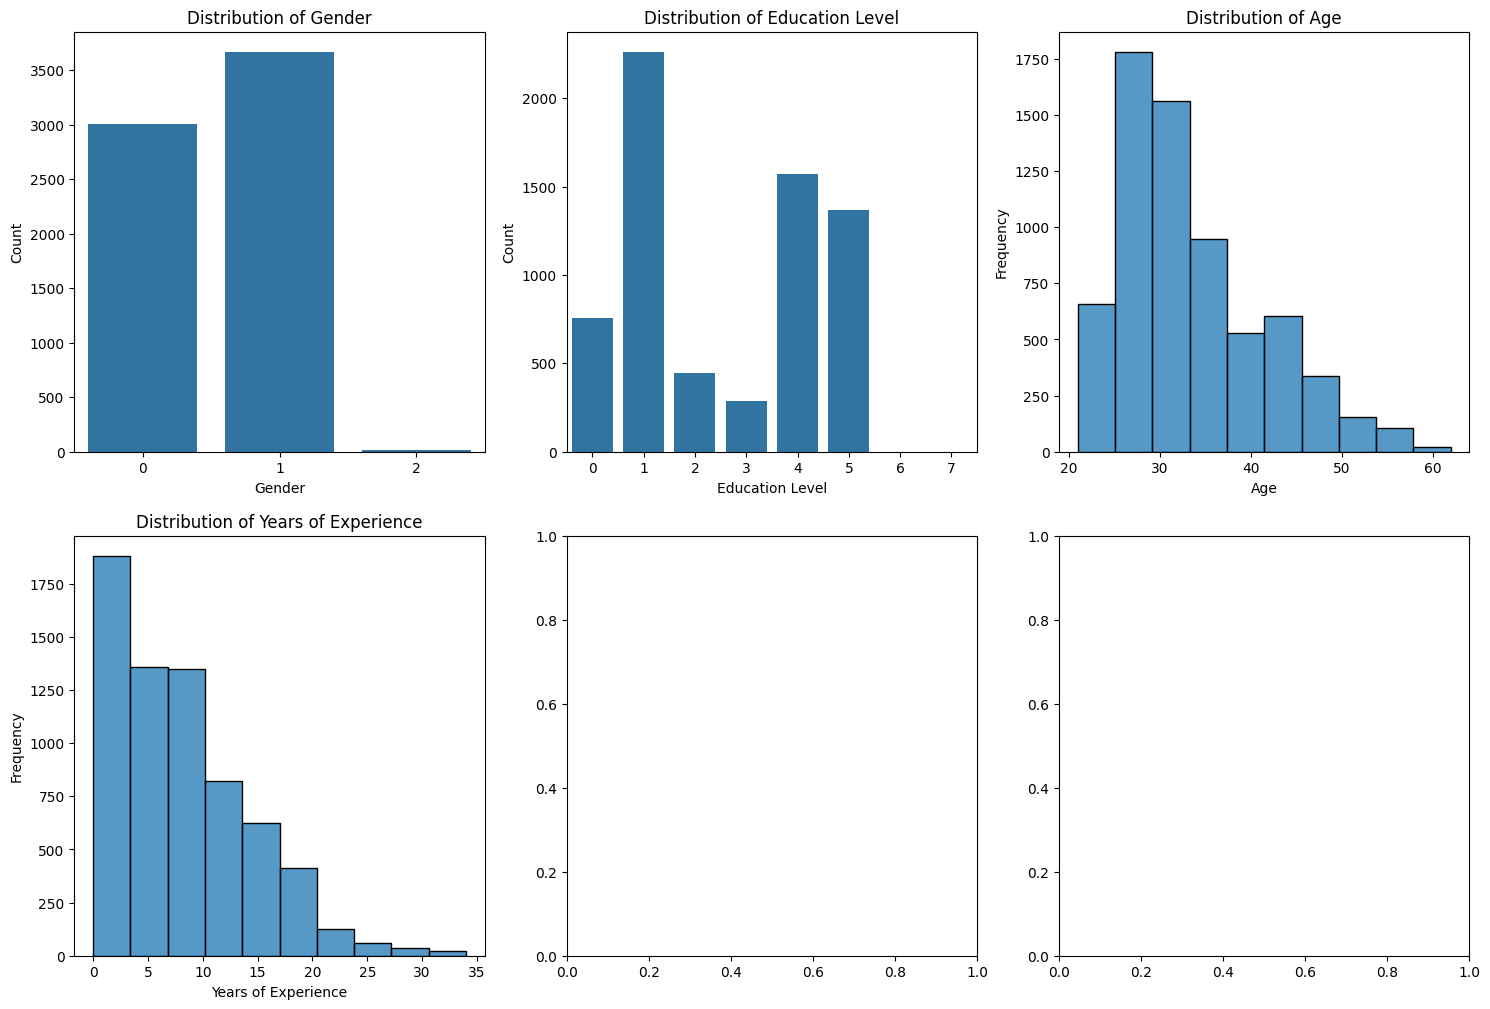

In [72]:

# Create a figure with subplots arranged in a grid
fig, ax = plt.subplots(2, 3, figsize=(18, 12))  # Adjust the layout to fit 5 plots

# Categorical data
sns.countplot(x='Gender', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Gender')
ax[0, 0].set_xlabel('Gender')
ax[0, 0].set_ylabel('Count')

sns.countplot(x='Education Level', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Education Level')
ax[0, 1].set_xlabel('Education Level')
ax[0, 1].set_ylabel('Count')

# Numerical data
sns.histplot(df['Age'], bins=10, kde=False, ax=ax[0, 2])
ax[0, 2].set_title('Distribution of Age')
ax[0, 2].set_xlabel('Age')
ax[0, 2].set_ylabel('Frequency')

sns.histplot(df['Years of Experience'], bins=10, kde=False, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Years of Experience')
ax[1, 0].set_xlabel('Years of Experience')
ax[1, 0].set_ylabel('Frequency')

sns.histplot(df['Salary'], bins=10, kde=False, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Salary')
ax[1, 1].set_xlabel('Salary')
ax[1, 1].set_ylabel('Frequency')

# Hide the unused subplot (bottom right)
ax[1, 2].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is loaded with appropriate data
# df = pd.read_csv('path_to_your_data.csv')

# Define the custom color palette
palette = {"Male": "red", "Female": "purple", "Other": "green"}

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="Education Level", y="Salary", hue="Gender", data=df, palette=palette)
bar_plot.set_title('Education Level vs Salary vs Gender')
bar_plot.set_xlabel('Education Level')
bar_plot.set_ylabel('Salary')
plt.legend(title='Gender')

# Show the plot
plt.show()


ValueError: Could not interpret value `Salary` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [34]:
# Splitting data into 25% training and 75% test sets

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)
x_train.shape

(5023, 53)

In [1]:

# Suppress FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)


#df = pd.read_csv(r'C:\Users\zeyne\Desktop\Salary_Data.csv')
df = pd.read_csv('~/Desktop/Salary_Data.csv')

    return data

def encode_features(data):
    le = LabelEncoder()
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = le.fit_transform(data[col])
    return data

def scale_features(data, features):
    scaler = StandardScaler()
    data[features] = scaler.fit_transform(data[features])
    return data

# Data loading and processing
data = load_and_preprocess_data(data_file_csv)
data = encode_features(data)
data = scale_features(data, ['Age', 'Years of Experience'])

X = data[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

svm = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate models
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"Random Forest MSE: {mse_rf}, R2: {r2_rf}")
print(f"SVM MSE: {mse_svm}, R2: {r2_svm}")

# Visualizations
sns.set(style="whitegrid")
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

residuals = y_test - y_pred_svm
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=50, kde=True, color='skyblue')
plt.title('Residuals of SVM Model: Distribution Analysis')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

# Density calculation for scatter plot
x = y_test
y = y_pred_svm
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=z, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Density')
plt.title('Comparison of Actual and Predicted Salaries: SVM')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', lw=4)
plt.show() 


IndentationError: unexpected indent (1021800006.py, line 8)

In [ ]:
"""

print(df.head())


# Assuming the column names are confirmed and correct
label_encoder = LabelEncoder()

# If 'Gender' and 'Education Level' are present, transform them
if 'Gender' in df.columns:
    df['Gender'] = label_encoder.fit_transform(df['Gender'])
else:
    print("Gender column not found.")

if 'Education Level' in df.columns:
    df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
else:
    print("Education Level column not found.")

# Check and transform 'Job Title' if present
if 'Job Title' in df.columns:
    df['Job Title'] = label_encoder.fit_transform(df['Job Title'])
else:
    print("Job Title column not found.")
    
"""

In [5]:
df = pd.read_csv('~/Desktop/Salary_Data.csv')

In [8]:
def cleanExtraSpaces(title_val): # get's rid of extra/double whitespace, improves accuracy
    return re.sub(r'\s+', ' ', title_val).strip()

def estimateJobRanking(job_title):
    base_score = 100
    delta = 30
    penalty = ["unior", "intern", "jr", "jr.",  "analyst", "clerk", "associate", "assistant", "specialist", "representative", "coordinator", "support"]
    upgrade = ["director", "manager", "senior", "sr", "sr.", "ceo", "chief", "cto", "vice", "vp", "svp", "avp", "principal", "lead"]
    weights = dict.fromkeys(penalty, -delta)
    weights.update(dict.fromkeys(upgrade, delta))
    return base_score + sum(map(lambda x: weights.get(x, 0), job_title.lower().split(' ')))


df = df[df['Salary'] >= 5000] # drops all salaries less than 5k because that is unreasonable (there was one that was $350)

df['Age'] = df['Age'].astype(int)
df['Years of Experience'] = df['Years of Experience'].astype(int)
df['Salary'] = df['Salary'].astype(int)


df['Job Title'] = df['Job Title'].astype(str)
df['Job Title'] = df['Job Title'].map(cleanExtraSpaces)
df['Job Ranking'] = df['Job Title'].map(estimateJobRanking)
df.drop(['Job Title'], axis=1, inplace=True)


label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])

In [9]:
df

,Age,Gender,Education Level,Years of Experience,Salary,Job Ranking
0,32,1,0,5,90000,100
1,28,0,3,3,65000,70
2,45,1,5,15,150000,160
3,36,0,0,7,60000,70
4,52,1,3,20,200000,130
...,...,...,...,...,...,...
6699,49,0,5,20,200000,130
6700,32,1,2,3,50000,70
6701,30,0,1,4,55000,130
6702,46,1,4,14,140000,130


In [13]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(5356, 5)

Random Forest

In [37]:
#Models training and evaluation
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [39]:
y_pred_rfr = rf.predict(X_test)

#print("Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr))
#print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_rfr))
#print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr,squared=False))


print(f"Random Forest MSE: {mse_rf}, R2: {r2_rf}")

Random Forest MSE: 82310841.62271444, R2: 0.9687064231947773


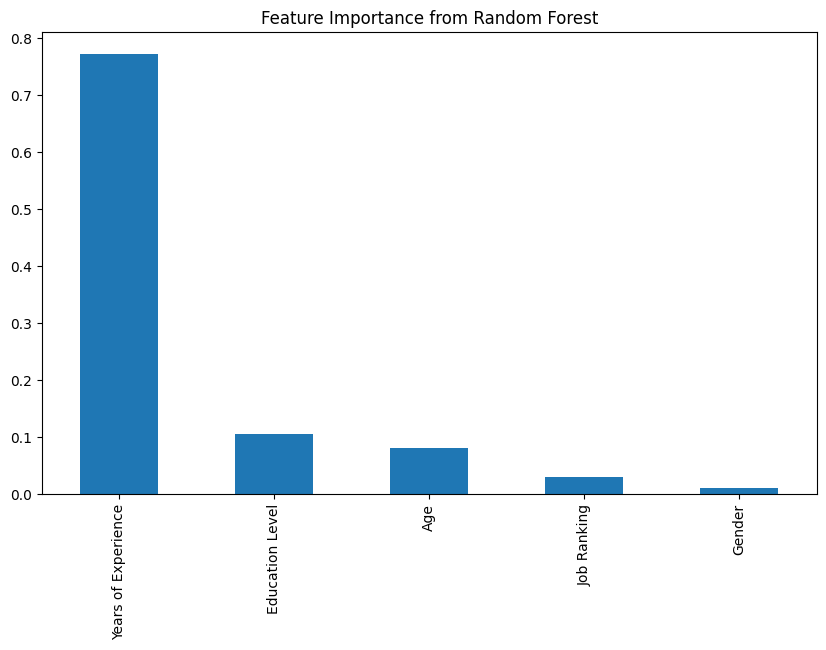

In [34]:
# Visualization of feature importance for Random Forest
feature_importance = pd.Series(rfr.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.show()

Decision Tree

In [21]:
 # Decision Tree model
dtr = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [24]:
y_pred_dtr = dtr.predict(X_test)

In [25]:
#Model Evaluation
mae = mean_absolute_error(y_test, y_pred_dtr)
print("Mean Absolute Error:", mae)


mse = mean_squared_error(y_test, y_pred_dtr)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score

# Calculate R-squared error
r2 = r2_score(y_test, y_pred_dtr)
print("R-squared error:", r2)

Mean Absolute Error: 6594.738006030628
Mean Squared Error: 131313756.04043002
R-squared error: 0.9500761135565952


In [32]:
#Inputting my own values 
output = dtr.predict([[36, 0, 0, 7, estimateJobRanking('Sales Associate')]])
try:
    print("Salary prediction is", int(output[0]))
except:
    print("Error: prediction was not possible.")

Salary prediction is 60000


In [43]:
# DecisionTreeRegressor with max_depth parameter
model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Fit the model using training data
model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plot_tree(model, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

NameError: name 'plot_tree' is not defined

<Figure size 1000x600 with 0 Axes>

Linear Regression

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
lr.score(X_test,y_test)

0.665182298661789

In [30]:
y_pred_lr = lr.predict(X_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_lr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_lr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_lr,squared=False))

Mean Squared Error : 880664008.4278044
Mean Absolute Error : 23616.73382882263
Root Mean Squared Error : 29675.98369772777


SVM 

In [45]:
svm = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)


In [46]:
print(f"SVM MSE: {mse_svm}, R2: {r2_svm}")

SVM MSE: 2617394468.343783, R2: 0.0048985867485281664


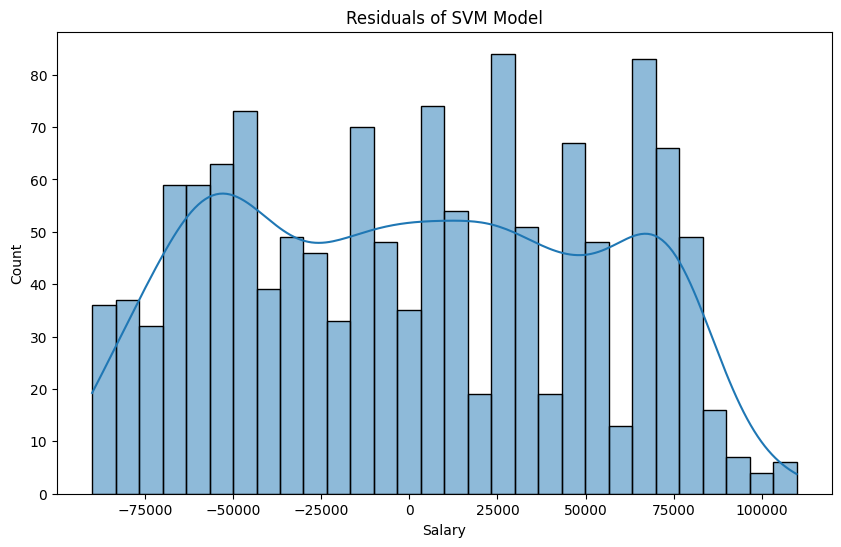

In [47]:
# Visualization of residuals for SVM
plt.figure(figsize=(10,6))
residuals = y_test - y_pred_svm
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals of SVM Model')
plt.show()

Logistic Regression 

In [52]:
# Logistic Regression

# Define a binary target variable: 1 if salary is above median, 0 otherwise
median_salary = df['Salary'].median()
df['Above Median Salary'] = (df['Salary'] > median_salary).astype(int)

# Split the data into features and target variable
X = df.drop('Above Median Salary', axis=1)
y = df['Above Median Salary']


# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

X_train shape: (5356, 5)
y_train shape: (5356,)
Accuracy: 0.14189693801344286
Classification Report:
              precision    recall  f1-score   support

       25000       0.28      0.52      0.37        21
       26000       0.00      0.00      0.00         2
       30000       0.00      0.00      0.00        11
       31000       0.00      0.00      0.00         2
       32000       0.00      0.00      0.00         5
       33000       0.00      0.00      0.00         1
       35000       0.00      0.00      0.00        25
       36000       0.00      0.00      0.00         5
       38000       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00        25
       41000       0.00      0.00      0.00         2
       42000       0.00      0.00      0.00         1
       45000       0.00      0.00      0.00        15
       48000       0.00      0.00      0.00         5
       49000       0.00      0.00      0.00         2
       50000       0.11      0.05 

In [54]:
# Logistic Regression

# Define a binary target variable: 1 if salary is above median, 0 otherwise
median_salary = df['Salary'].median()
df['Above Median Salary'] = (df['Salary'] > median_salary).astype(int)

# Drop the original 'Salary' column
df.drop('Salary', axis=1, inplace=True)

# Label encode categorical variables
label_encoders = {}
for column in ['Gender', 'Education Level', 'Job Title']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features and target variable
X = df.drop('Above Median Salary', axis=1)
y = df['Above Median Salary']

# Check for missing values
print(df.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

KeyError: 'Salary'

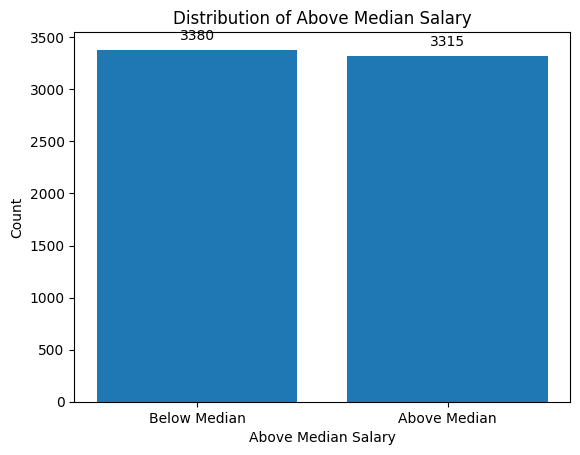

In [55]:
# Count the occurrences of each class
class_counts = df['Above Median Salary'].value_counts()

# Plot the bar chart
plt.bar(class_counts.index, class_counts.values)

# Add labels and title
plt.xlabel('Above Median Salary')
plt.ylabel('Count')
plt.title('Distribution of Above Median Salary')

# Add annotation for each bar
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 100, str(count), ha='center')

# Show the plot
plt.xticks([0, 1], ['Below Median', 'Above Median'])
plt.show()

In [58]:
# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(age.values.reshape(-1, 1), salary)

# Predict probabilities
age_range = np.linspace(age.min(), age.max(), 100).reshape(-1, 1)
probabilities = model.predict_proba(age_range)[:, 1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, salary, alpha=0.5, color='blue')

# Plot curve line
plt.plot(age_range, probabilities, color='red')

# Adding labels and title
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Above Median Salary')

# Show plot
plt.show()


NameError: name 'age' is not defined

<h2>Conclusion<h2>

The Random Forest model performed the best, therefore this model is the best one for predicting salaries. 